------knn classification--------
for k = 1
point x51 value(  0.3101 ) classified as class1
point x52 value(  0.4915 ) classified as class1
point x53 value(  0.5594 ) classified as class2
point x54 value(  0.6066 ) classified as class2
point x55 value(  0.0111 ) classified as class1
point x56 value(  0.2194 ) classified as class1
point x57 value(  0.5825 ) classified as class2
point x58 value(  0.1695 ) classified as class1
point x59 value(  0.4094 ) classified as class1
point x60 value(  0.8648 ) classified as class2
point x61 value(  0.9298 ) classified as class2
point x62 value(  0.0806 ) classified as class1
point x63 value(  0.3189 ) classified as class1
point x64 value(  0.3856 ) classified as class1
point x65 value(  0.3318 ) classified as class1
point x66 value(  0.1274 ) classified as class1
point x67 value(  0.2412 ) classified as class1
point x68 value(  0.8011 ) classified as class2
point x69 value(  0.3209 ) classified as class1
point x70 value(  0.5700 ) classified as clas

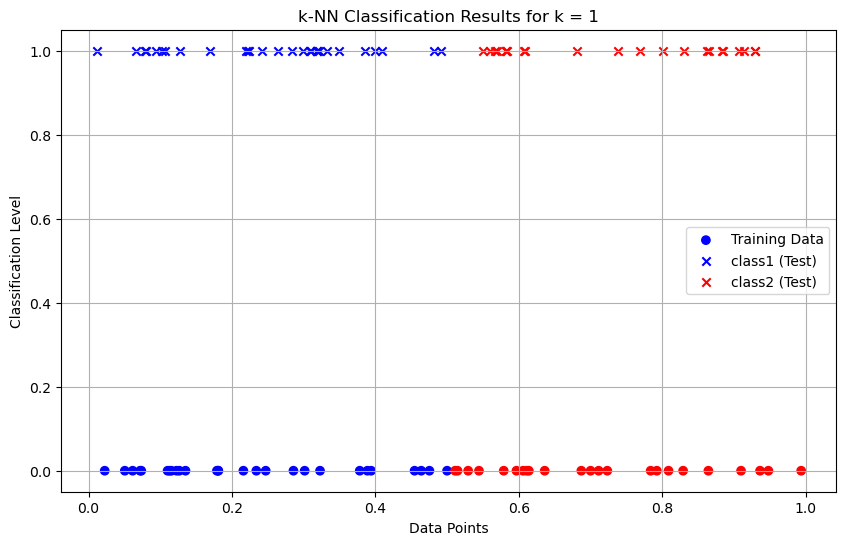

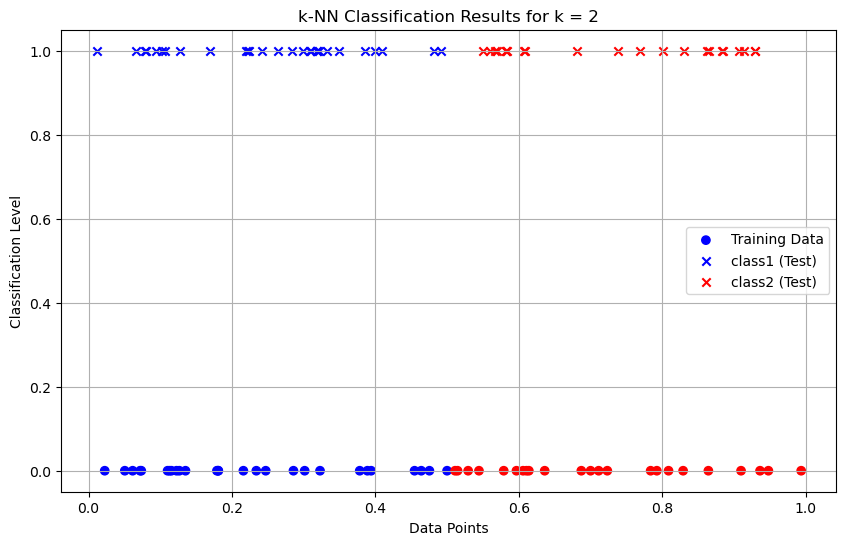

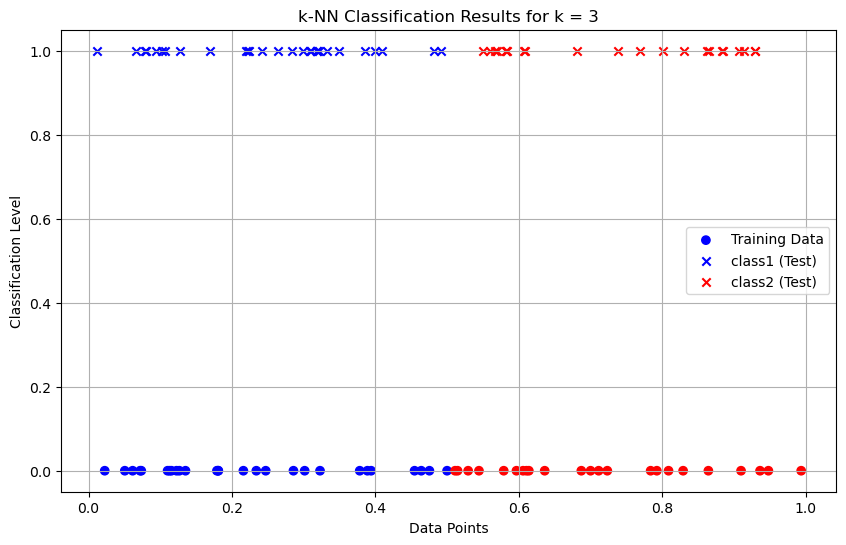

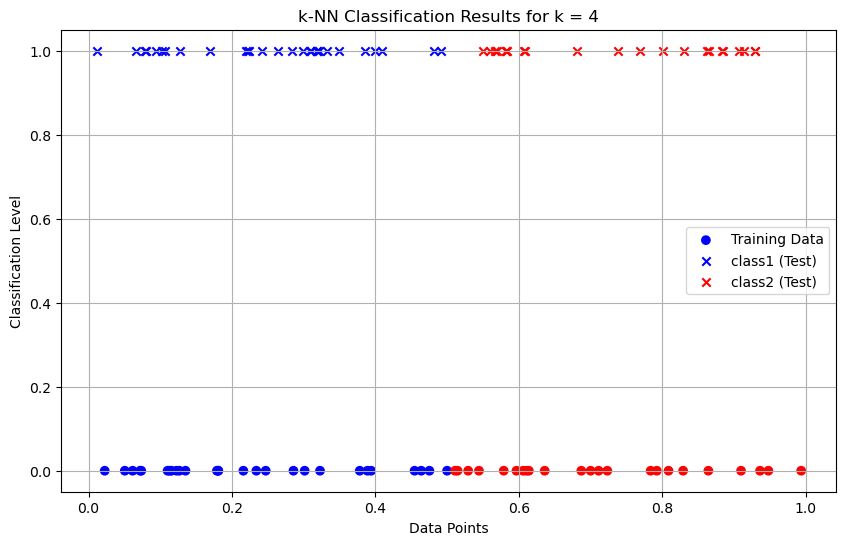

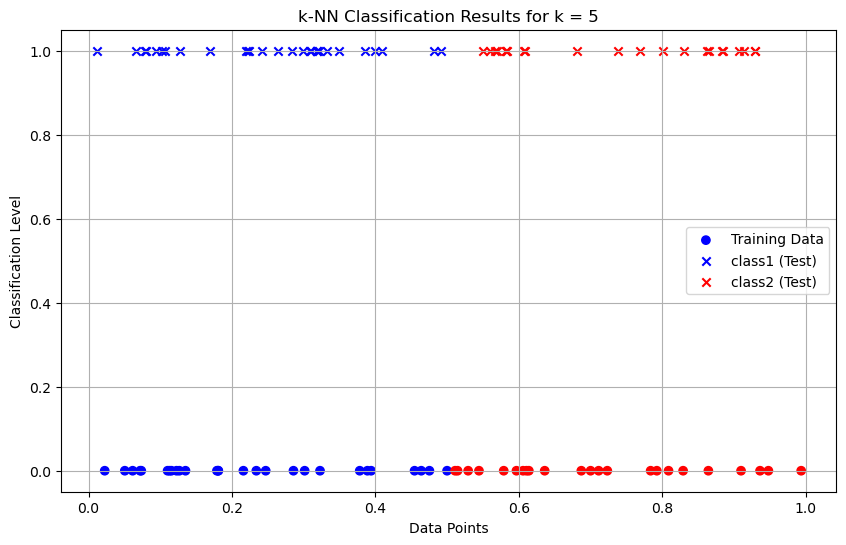

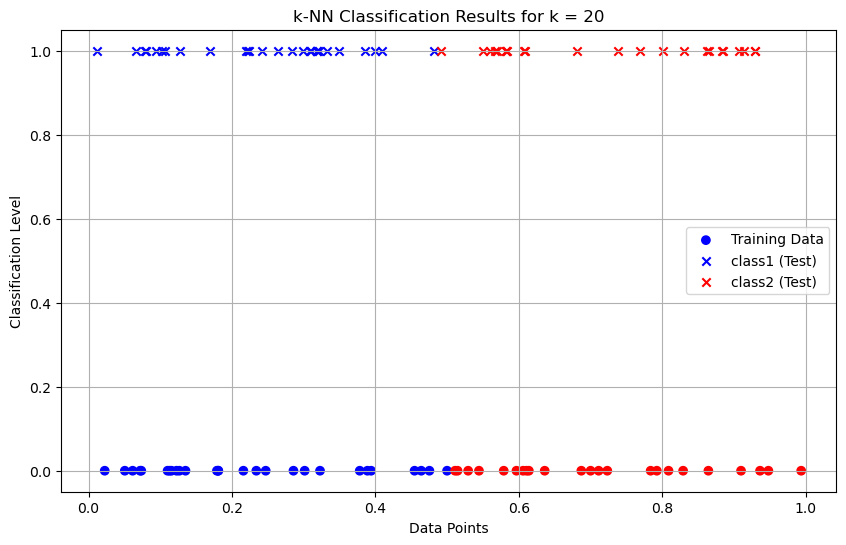

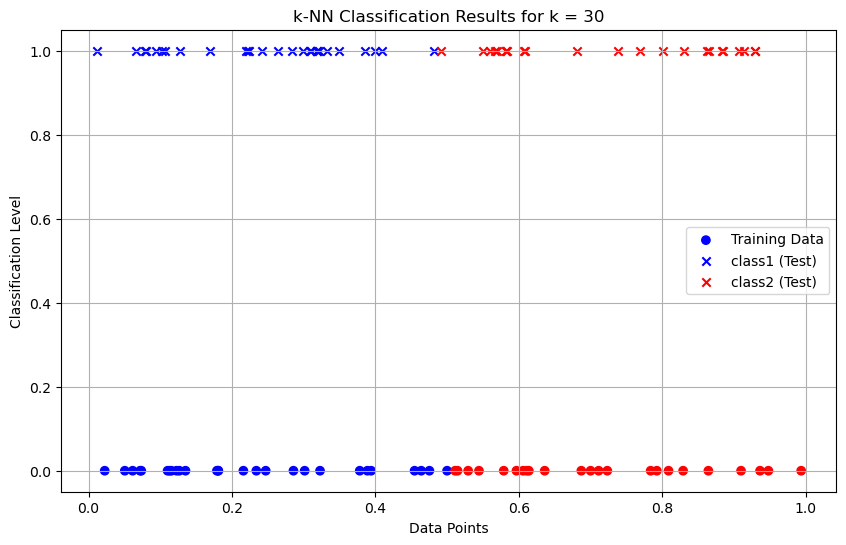

In [11]:
import numpy as np

import matplotlib.pyplot as plt

from collections import Counter
data = np.random.rand(100)

labels = ["class1" if x<= 0.5 else "class2" for x in data[:50]]

train_data,train_labels,test_data = data[:50],labels,data[50:]


def knn_classifier(train_data,train_labels,test_point,k):

    distances = sorted(((abs(test_point-train_data[i]),train_labels[i]) for i in range(len(train_data))))

    return Counter(label for _,label in distances[:k]).most_common(1)[0][0]


k_values = [1,2,3,4,5,20,30]

results = {}

print("------knn classification--------")

for k in k_values:

    print('for k =', k)

    classified_labels = [knn_classifier(train_data,train_labels,test_point,k) for test_point in test_data]

    results[k] = classified_labels


    for i ,label in enumerate(classified_labels,start=51):

        print(f'point x{i} value(  {test_data[i-51]:.4f} ) classified as {label}')

    print('\n')


    print('classification complete')


for k, classified_labels in results.items():

    plt.figure(figsize=(10, 6))

    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "class1" else "red" for label in train_labels], label="Training Data", marker="o")

    plt.scatter([test_data[i] for i in range(len(test_data)) if classified_labels[i] == "class1"], [1] * classified_labels.count("class1"), c="blue", label="class1 (Test)", marker="x")

    plt.scatter([test_data[i] for i in range(len(test_data)) if classified_labels[i] == "class2"], [1] * classified_labels.count("class2"), c="red", label="class2 (Test)", marker="x")

    plt.title(f"k-NN Classification Results for k = {k}")

    plt.xlabel("Data Points")

    plt.ylabel("Classification Level")

    plt.legend()

    plt.grid(True)

    plt.show()

--- k-Nearest Neighbors Classification ---
Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified

Results for k = 1:
Point x51 (value: 0.0013) is classified as Class1
Point x52 (value: 0.6381) is classified as Class2
Point x53 (value: 0.5020) is classified as Class2
Point x54 (value: 0.0131) is classified as Class1
Point x55 (value: 0.1887) is classified as Class1
Point x56 (value: 0.9072) is classified as Class2
Point x57 (value: 0.4025) is classified as Class1
Point x58 (value: 0.9944) is classified as Class2
Point x59 (value: 0.3163) is classified as Class1
Point x60 (value: 0.3207) is classified as Class1
Point x61 (value: 0.7031) is classified as Class2
Point x62 (value: 0.4369) is classified as Class1
Point x63 (value: 0.6252) is classified as Class2
Point x64 (value: 0.5145) is classified as Class2
Point x65 (value: 0.9915) is classified as Class2
Point x66 (value: 0.7143) is clas

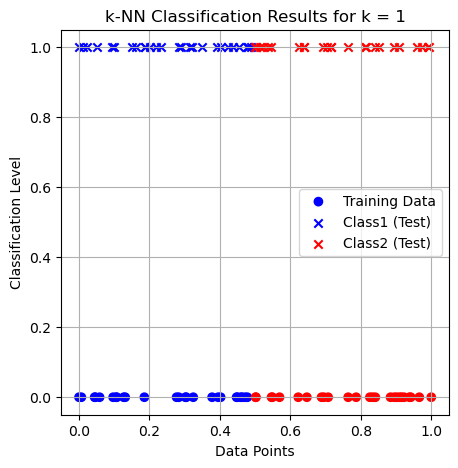

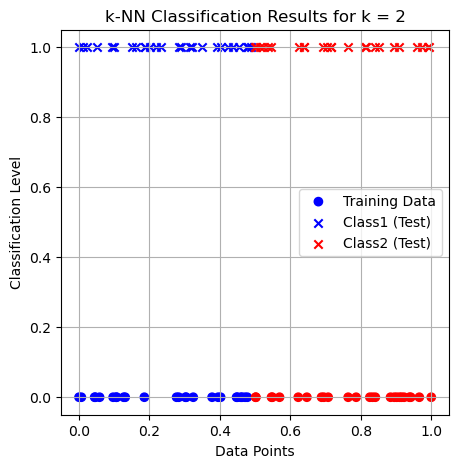

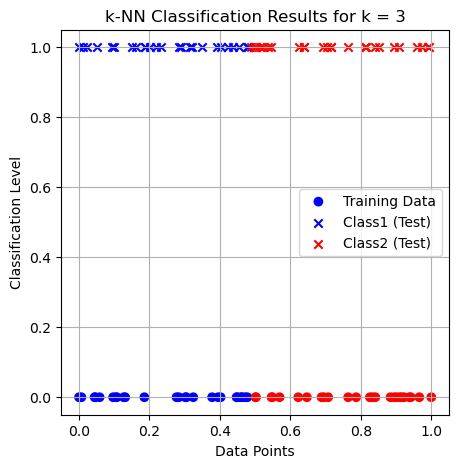

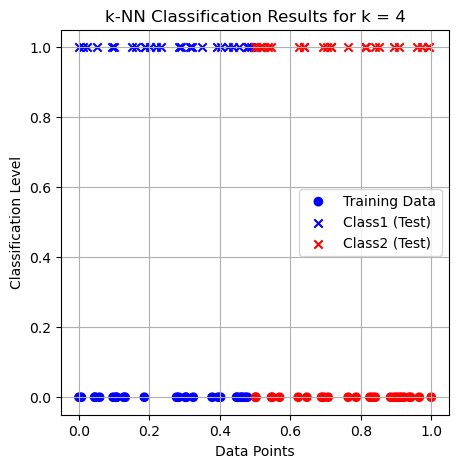

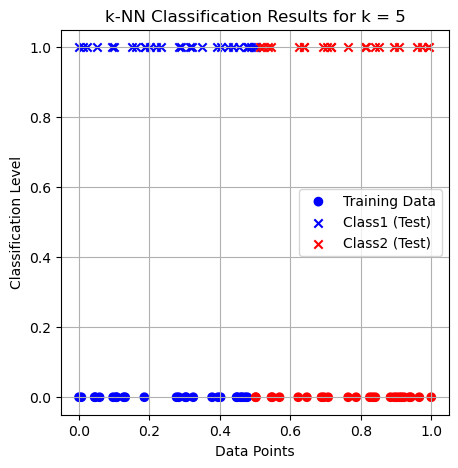

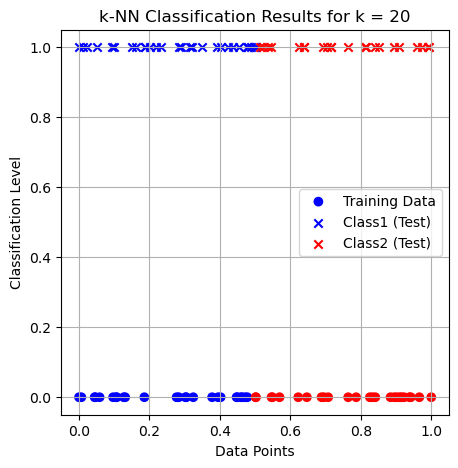

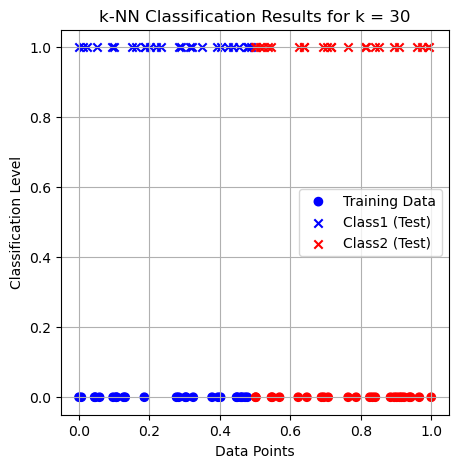

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

data = np.random.rand(100)

labels = ["Class1" if x <= 0.5 else "Class2" for x in data[:50]]


def euclidean_distance(x1, x2):
    return abs(x1 - x2)


def knn_classifier(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, train_data[i]), train_labels[i]) for i in range(len(train_data))]

    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    k_nearest_labels = [label for _, label in k_nearest_neighbors]

    return Counter(k_nearest_labels).most_common(1)[0][0]


train_data = data[:50]
train_labels = labels

test_data = data[50:]

k_values = [1, 2, 3, 4, 5, 20, 30]

print("--- k-Nearest Neighbors Classification ---")
print("Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)")
print("Testing dataset: Remaining 50 points to be classified\n")

results = {}

for k in k_values:
    print(f"Results for k = {k}:")
    classified_labels = [knn_classifier(train_data, train_labels, test_point, k) for test_point in test_data]
    results[k] = classified_labels

    for i, label in enumerate(classified_labels, start=51):
        print(f"Point x{i} (value: {test_data[i - 51]:.4f}) is classified as {label}")
    print("\n")

print("Classification complete.\n")

for k in k_values:
    classified_labels = results[k]
    class1_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i] for i in range(len(test_data)) if classified_labels[i] == "Class2"]

    plt.figure(figsize=(5, 5))
    plt.scatter(train_data, [0] * len(train_data), c=["blue" if label == "Class1" else "red" for label in train_labels],
                label="Training Data", marker="o")
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")

    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()

--- k-Nearest Neighbors Classification using scikit-learn ---
Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)
Testing dataset: Remaining 50 points to be classified

Results for k = 1:
Point x51 (value: 0.2614) is classified as Class1
Point x52 (value: 0.9764) is classified as Class2
Point x53 (value: 0.5754) is classified as Class2
Point x54 (value: 0.4988) is classified as Class1
Point x55 (value: 0.8058) is classified as Class2
Point x56 (value: 0.6520) is classified as Class2
Point x57 (value: 0.8760) is classified as Class2
Point x58 (value: 0.2957) is classified as Class1
Point x59 (value: 0.7716) is classified as Class2
Point x60 (value: 0.1804) is classified as Class1
Point x61 (value: 0.5952) is classified as Class2
Point x62 (value: 0.7386) is classified as Class2
Point x63 (value: 0.7395) is classified as Class2
Point x64 (value: 0.3418) is classified as Class1
Point x65 (value: 0.6725) is classified as Class2
Point x66 (val

c:\Users\Sameer Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Sameer Patil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

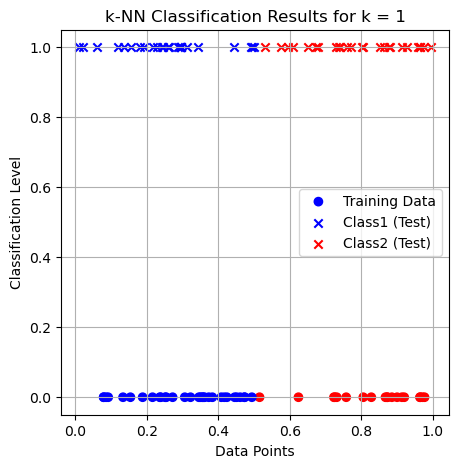

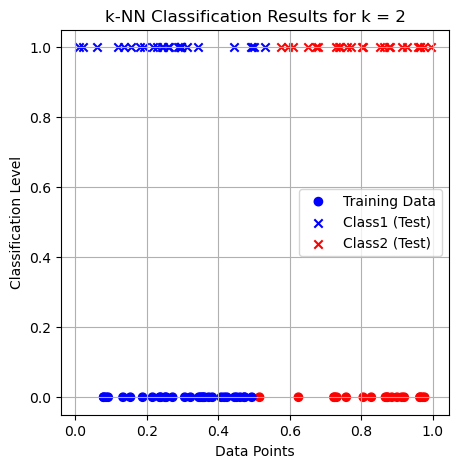

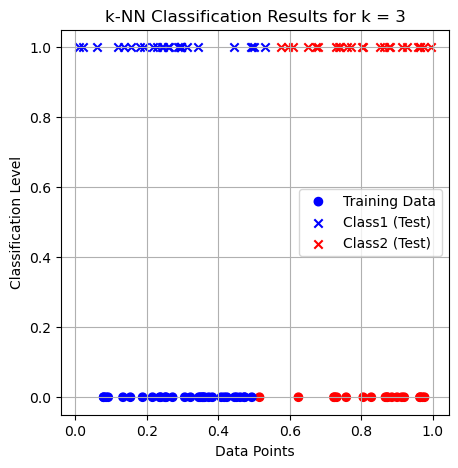

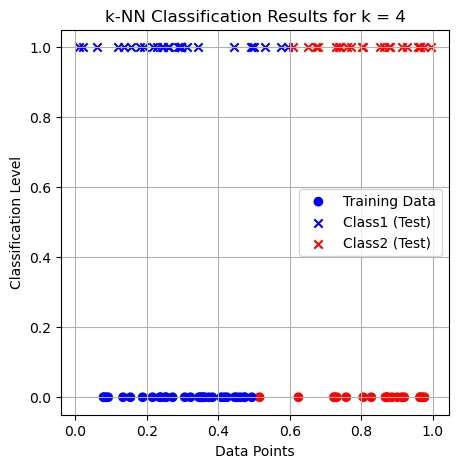

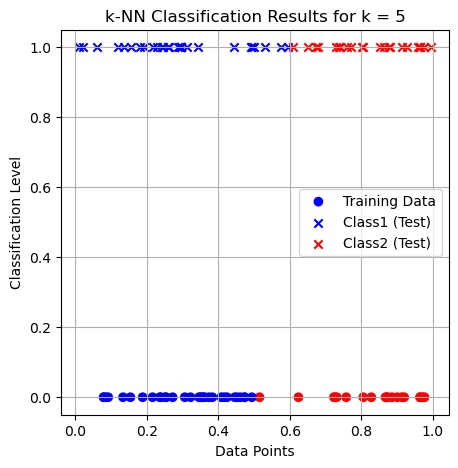

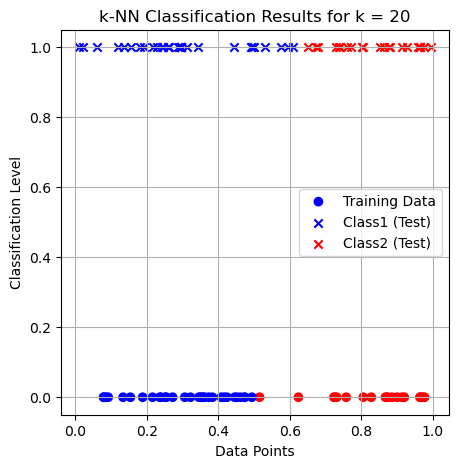

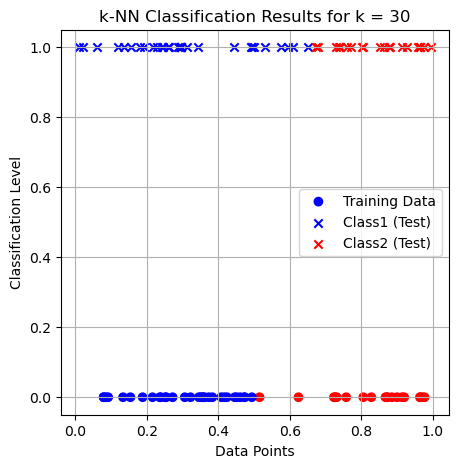

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate random data
data = np.random.rand(100)

# First 50 points are for training and labeled based on rule: x <= 0.5 -> Class1, else Class2
train_data = data[:50].reshape(-1, 1)
train_labels = ["Class1" if x <= 0.5 else "Class2" for x in train_data]

# Remaining 50 points are for testing
test_data = data[50:].reshape(-1, 1)

k_values = [1, 2, 3, 4, 5, 20, 30]

print("--- k-Nearest Neighbors Classification using scikit-learn ---")
print("Training dataset: First 50 points labeled based on the rule (x <= 0.5 -> Class1, x > 0.5 -> Class2)")
print("Testing dataset: Remaining 50 points to be classified\n")

results = {}

for k in k_values:
    print(f"Results for k = {k}:")
    
    # Create and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    
    # Predict
    predicted_labels = knn.predict(test_data)
    results[k] = predicted_labels

    for i, label in enumerate(predicted_labels, start=51):
        print(f"Point x{i} (value: {test_data[i - 51][0]:.4f}) is classified as {label}")
    print("\n")

print("Classification complete.\n")

# Visualization
for k in k_values:
    classified_labels = results[k]
    
    class1_points = [test_data[i][0] for i in range(len(test_data)) if classified_labels[i] == "Class1"]
    class2_points = [test_data[i][0] for i in range(len(test_data)) if classified_labels[i] == "Class2"]

    plt.figure(figsize=(5, 5))
    plt.scatter(train_data, [0] * len(train_data),
                c=["blue" if label == "Class1" else "red" for label in train_labels],
                label="Training Data", marker="o")
    plt.scatter(class1_points, [1] * len(class1_points), c="blue", label="Class1 (Test)", marker="x")
    plt.scatter(class2_points, [1] * len(class2_points), c="red", label="Class2 (Test)", marker="x")

    plt.title(f"k-NN Classification Results for k = {k}")
    plt.xlabel("Data Points")
    plt.ylabel("Classification Level")
    plt.legend()
    plt.grid(True)
    plt.show()
